1. Brightness & Contrast

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('luffy.jpg')  


# a. Open a color image and display.
cv2.imshow("Original Image", img1)


# b. Change the brightness by a constant (e.g., 100).
brightness_offset = 100
brighter_img = cv2.add(img1, (brightness_offset, brightness_offset, brightness_offset, 0))
cv2.imshow("Brighter Image", brighter_img)


# c. Change the contrast by a constant (e.g., 0.5, 2).
alpha_1 = 0.5  # reduce contrast
beta_1 = 0
lower_contrast_img = cv2.convertScaleAbs(img1, alpha=alpha_1, beta=beta_1)

alpha_2 = 2.0  # increase contrast
beta_2 = 0
higher_contrast_img = cv2.convertScaleAbs(img1, alpha=alpha_2, beta=beta_2)

cv2.imshow("Lower Contrast (alpha=0.5)", lower_contrast_img)
cv2.imshow("Higher Contrast (alpha=2.0)", higher_contrast_img)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

2. Linear Blend

In [2]:
# a. Open a second images and display. Resize the second image to match the first, if needed.
img2 = cv2.imread('Tony_Tony_Chopper.jpg')
if img2 is None:
    raise FileNotFoundError("Could not load your_second_image.jpg. Check the path.")

# Display the second image
cv2.imshow("Second Image", img2)

# Resize img2 to match img1’s size
height1, width1 = img1.shape[:2]
height2, width2 = img2.shape[:2]

if (height1, width1) != (height2, width2):
    img2 = cv2.resize(img2, (width1, height1), interpolation=cv2.INTER_CUBIC)
cv2.imshow("Second Image after Resizing", img2)


# b. Implement a linear blend of the two images.
# c. Paste the blended images at different stages of blending (at alpha = 0.2, alpha = 0.5, and alpha = 0.8).
alphas = [0.2, 0.5, 0.8]

for alpha in alphas:
    blended = cv2.addWeighted(img1, 1 - alpha, img2, alpha, 0)
    window_name = f"Blended at alpha={alpha}"
    cv2.imshow(window_name, blended)
    # cv2.waitKey(0)

# cv2.waitKey(0)
# cv2.destroyAllWindows()


# d. (Optional) Save the blended images to a file, create a GIF animation
alphas = [0.2, 0.5, 0.8]
for alpha in alphas:
    blended = cv2.addWeighted(img1, 1 - alpha, img2, alpha, 0)
    filename = f"blended_alpha_{alpha}.jpg"
    cv2.imwrite(filename, blended)

import imageio.v2 as imageio
import os

alphas = np.linspace(0, 1, 10)  # create 10 frames
filenames = []

for idx, alpha in enumerate(alphas):
    blended = cv2.addWeighted(img1, 1 - alpha, img2, alpha, 0)
    temp_filename = f"temp_{idx}.png"
    cv2.imwrite(temp_filename, blended)
    filenames.append(temp_filename)

with imageio.get_writer('blended_animation.gif', mode='I', duration=0.1) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Cleanup temporary files
for f in filenames:
    os.remove(f)

print("GIF created: blended_animation.gif")

# cv2.destroyAllWindows()

GIF created: blended_animation.gif


3. Histogram Equalization

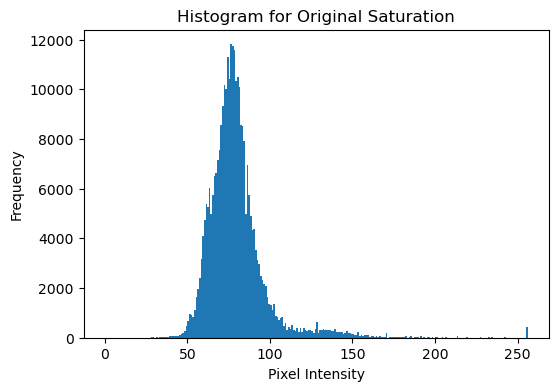

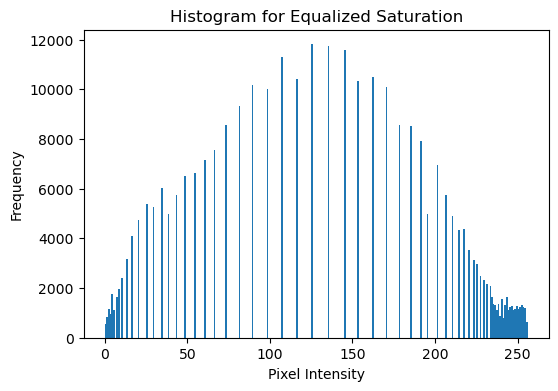

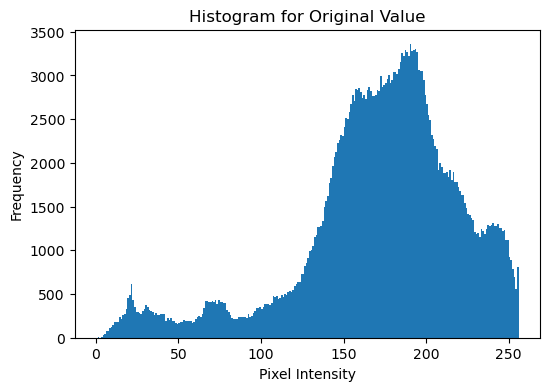

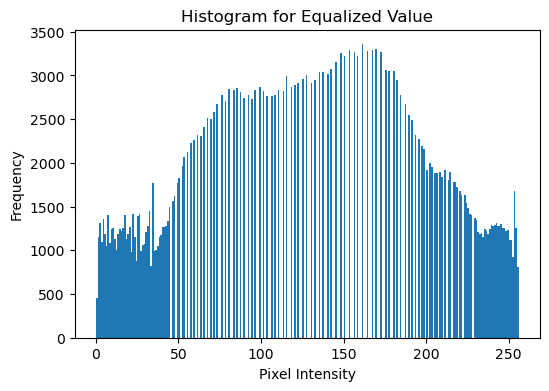

2025-02-04 21:42:26.594 python[4683:185009] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-04 21:42:26.594 python[4683:185009] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [ ]:
# a. Open ‘nail_polish’ and apply histogram equalization to it. To do so, convert the image to HSV color space, apply histogram equalization once on the ‘saturation’ channel and once on the ‘value’ channel.
# Load the nail_polish image
nail_polish = cv2.imread('nail_polish.jpg')
if nail_polish is None:
    raise FileNotFoundError("Could not load nail_polish.jpg. Check the path.")
cv2.imshow("Original Nail Polish Image", nail_polish)

# Convert to HSV
nail_polish_hsv = cv2.cvtColor(nail_polish, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(nail_polish_hsv)

# Equalize histogram for the S channel
s_eq = cv2.equalizeHist(s)

# Merge back
hsv_s_eq = cv2.merge([h, s_eq, v])
nail_polish_s_eq = cv2.cvtColor(hsv_s_eq, cv2.COLOR_HSV2BGR)

cv2.imshow("S-Equalized Nail Polish", nail_polish_s_eq)

# Equalize histogram for the V channel
v_eq = cv2.equalizeHist(v)

# Merge back
hsv_v_eq = cv2.merge([h, s, v_eq])
nail_polish_v_eq = cv2.cvtColor(hsv_v_eq, cv2.COLOR_HSV2BGR)

cv2.imshow("V-Equalized Nail Polish", nail_polish_v_eq)


# Histogram Equalization
def show_histogram(img, channel_name="Value"):
    plt.figure(figsize=(6,4))
    plt.title(f"Histogram for {channel_name}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.hist(img.ravel(), bins=256, range=(0,256))
    plt.show()

# Display original, S-equalized, and V-equalized histograms
show_histogram(s, "Original Saturation")
show_histogram(s_eq, "Equalized Saturation")

show_histogram(v, "Original Value")
show_histogram(v_eq, "Equalized Value")


cv2.waitKey(0)
cv2.destroyAllWindows()